In [92]:
import sys 
sys.path.append("../")
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from plotting import CandlePlot

In [94]:
from infrastructure.instrument_collection import instrumentCollection as ic

In [66]:
pair = "EUR_USD"
granularity = "H2"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST = [10,20,50,100,200]

In [67]:
df_plot = df.iloc[:200]

In [68]:
df.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
0,2023-03-15 19:00:00+00:00,16347,1.05856,1.05926,1.05741,1.05756,1.05848,1.05917,1.05731,1.05745,1.05864,1.05935,1.05749,1.05766
1,2023-03-15 21:00:00+00:00,3443,1.05760,1.05818,1.05745,1.05785,1.05735,1.05809,1.05723,1.05777,1.05784,1.05852,1.05755,1.05793
2,2023-03-15 23:00:00+00:00,9698,1.05784,1.05981,1.05730,1.05898,1.05776,1.05973,1.05721,1.05888,1.05793,1.05990,1.05739,1.05907
3,2023-03-16 01:00:00+00:00,11937,1.05898,1.05992,1.05863,1.05924,1.05889,1.05982,1.05854,1.05917,1.05906,1.06002,1.05871,1.05932
4,2023-03-16 03:00:00+00:00,6378,1.05924,1.06034,1.05899,1.06028,1.05916,1.06027,1.05891,1.06020,1.05933,1.06043,1.05907,1.06037


In [69]:
df.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [70]:
df_ma = df[['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [71]:
df_ma.head()

,time,volume,mid_o,mid_h,mid_l,mid_c
0,2023-03-15 19:00:00+00:00,16347,1.05856,1.05926,1.05741,1.05756
1,2023-03-15 21:00:00+00:00,3443,1.05760,1.05818,1.05745,1.05785
2,2023-03-15 23:00:00+00:00,9698,1.05784,1.05981,1.05730,1.05898
3,2023-03-16 01:00:00+00:00,11937,1.05898,1.05992,1.05863,1.05924
4,2023-03-16 03:00:00+00:00,6378,1.05924,1.06034,1.05899,1.06028


In [72]:
for ma in MA_LIST:
    df_ma[f'MA_{ma}'] = df_ma.mid_c.rolling(window=ma).mean()

df_ma.dropna(inplace=True)
df_ma.reset_index(inplace=True, drop=True)

In [73]:
df_plot= df_ma.iloc[:500]

In [74]:
cp = CandlePlot(df_plot)

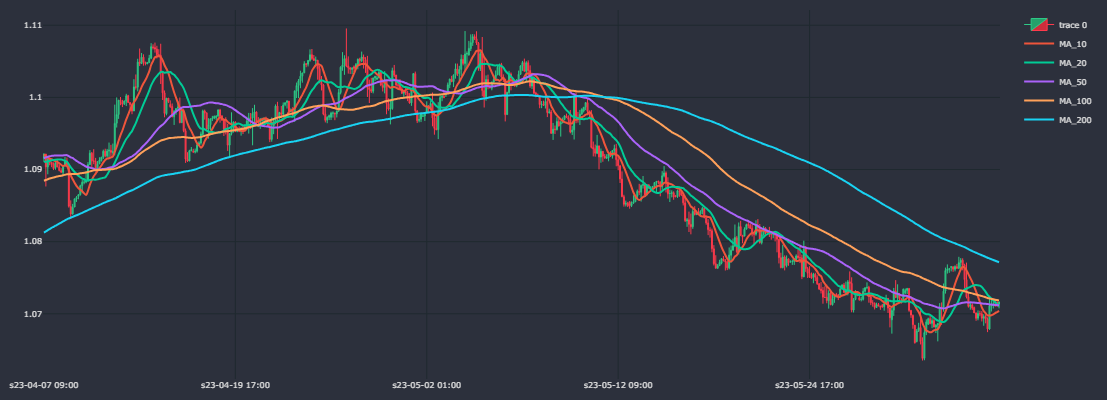

In [75]:
# cp.fig.add_trace(go.Scatter(
#     x=cp.df_plot.sTime,
#     y=cp.df_plot.MA_10,
#     line=dict(width=2),
#     line_shape="spline",
#     name="MA_10"
# ))
cp.show_plot(line_traces=[f"MA_{x}" for x in MA_LIST])

In [76]:
df_ma.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,MA_50,MA_100,MA_200
0,2023-04-07 09:00:00+00:00,1554,1.09154,1.09218,1.09105,1.09218,1.092109,1.091095,1.091557,1.088455,1.081261
1,2023-04-07 11:00:00+00:00,6537,1.09215,1.09216,1.08765,1.09037,1.091804,1.091076,1.091679,1.088546,1.081425
2,2023-04-07 13:00:00+00:00,4192,1.09036,1.09150,1.08934,1.09150,1.091642,1.091101,1.091768,1.088653,1.081593
3,2023-04-07 15:00:00+00:00,1486,1.09148,1.09156,1.09059,1.09099,1.091524,1.091180,1.091857,1.088751,1.081753
4,2023-04-07 17:00:00+00:00,1269,1.09102,1.09104,1.09033,1.09072,1.091428,1.091283,1.091897,1.088835,1.081910


In [77]:
# NONE means no trade
MA_S = "MA_10"
MA_L = "MA_20"
BUY = 1
SELL = -1
NONE = 0

In [78]:
# take just MA_10 and MA_20
# to detect a trade, we need to know the difference between the short and the long lines. E.g. MA_10 - MA_20 
df_an = df_ma[['time','mid_o','mid_h','mid_l','mid_c', MA_S, MA_L]].copy()

In [79]:
df_an.head(40)

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20
0,2023-04-07 09:00:00+00:00,1.09154,1.09218,1.09105,1.09218,1.092109,1.091095
1,2023-04-07 11:00:00+00:00,1.09215,1.09216,1.08765,1.09037,1.091804,1.091076
2,2023-04-07 13:00:00+00:00,1.09036,1.09150,1.08934,1.09150,1.091642,1.091101
3,2023-04-07 15:00:00+00:00,1.09148,1.09156,1.09059,1.09099,1.091524,1.091180
4,2023-04-07 17:00:00+00:00,1.09102,1.09104,1.09033,1.09072,1.091428,1.091283
5,2023-04-07 19:00:00+00:00,1.09078,1.09099,1.08993,1.09012,1.091280,1.091325
6,2023-04-09 21:00:00+00:00,1.09026,1.09116,1.08997,1.09095,1.091169,1.091361
7,2023-04-09 23:00:00+00:00,1.09097,1.09147,1.09034,1.09035,1.091056,1.091382
8,2023-04-10 01:00:00+00:00,1.09036,1.09068,1.08974,1.08986,1.090860,1.091376
9,2023-04-10 03:00:00+00:00,1.08986,1.09018,1.08952,1.08963,1.090667,1.091395


In [80]:
df_an['DELTA'] = df_an.MA_10 - df_an.MA_20
df_an['DELTA_PREV'] = df_an.DELTA.shift(1)

In [81]:
df_an.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,DELTA,DELTA_PREV
0,2023-04-07 09:00:00+00:00,1.09154,1.09218,1.09105,1.09218,1.092109,1.091095,0.001014,NaN
1,2023-04-07 11:00:00+00:00,1.09215,1.09216,1.08765,1.09037,1.091804,1.091076,0.000728,0.001014
2,2023-04-07 13:00:00+00:00,1.09036,1.09150,1.08934,1.09150,1.091642,1.091101,0.000541,0.000728
3,2023-04-07 15:00:00+00:00,1.09148,1.09156,1.09059,1.09099,1.091524,1.091180,0.000344,0.000541
4,2023-04-07 17:00:00+00:00,1.09102,1.09104,1.09033,1.09072,1.091428,1.091283,0.000145,0.000344


In [82]:
def is_trade(row):
    if row.DELTA >=0 and row.DELTA_PREV < 0:
        return BUY
    elif row.DELTA < 0 and row.DELTA_PREV >= 0:
        return SELL
    return NONE
    

In [84]:
df_an['TRADE'] = df_an.apply(is_trade, axis = 1)

In [85]:
df_an.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,DELTA,DELTA_PREV,TRADE
0,2023-04-07 09:00:00+00:00,1.09154,1.09218,1.09105,1.09218,1.092109,1.091095,0.001014,NaN,0
1,2023-04-07 11:00:00+00:00,1.09215,1.09216,1.08765,1.09037,1.091804,1.091076,0.000728,0.001014,0
2,2023-04-07 13:00:00+00:00,1.09036,1.09150,1.08934,1.09150,1.091642,1.091101,0.000541,0.000728,0
3,2023-04-07 15:00:00+00:00,1.09148,1.09156,1.09059,1.09099,1.091524,1.091180,0.000344,0.000541,0
4,2023-04-07 17:00:00+00:00,1.09102,1.09104,1.09033,1.09072,1.091428,1.091283,0.000145,0.000344,0


In [97]:
df_trades = df_an[df_an.TRADE != NONE].copy()

In [87]:
df_trades.shape

(195, 10)

In [88]:
df_trades.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,DELTA,DELTA_PREV,TRADE
5,2023-04-07 19:00:00+00:00,1.09078,1.09099,1.08993,1.09012,1.091280,1.091325,-0.000045,0.000145,-1
26,2023-04-11 13:00:00+00:00,1.09122,1.09282,1.09074,1.09112,1.089059,1.088611,0.000448,-0.000062,1
65,2023-04-14 19:00:00+00:00,1.09990,1.09992,1.09922,1.09944,1.103365,1.103484,-0.000118,0.000503,-1
88,2023-04-18 17:00:00+00:00,1.09704,1.09744,1.09672,1.09713,1.095649,1.095202,0.000447,-0.000073,1
100,2023-04-19 17:00:00+00:00,1.09659,1.09668,1.09518,1.09528,1.095967,1.096250,-0.000283,0.000023,-1


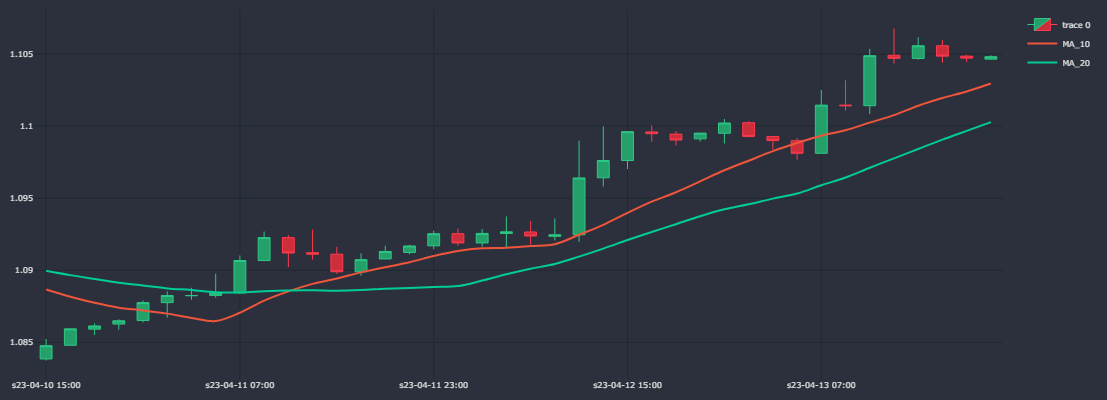

In [90]:
cp = CandlePlot(df_an.iloc[15:55])
cp.show_plot(line_traces=[MA_S,MA_L])

In [95]:
ic.LoadInstruments("../data")

In [96]:
ic.instruments_dict[pair]

{'name': 'EUR_USD', 'ins_type': 'CURRENCY', 'displayName': 'EUR/USD', 'pipLocation': 0.0001, 'tradeUnitsPrecision': 0, 'marginRate': 0.0333}